## STAT8017 Assignment 2 suggested sol 2019 sem1

packages to be used in the suggested solution 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.cluster import DBSCAN
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score
from sklearn.metrics import silhouette_score, calinski_harabaz_score

import scipy.cluster.hierarchy as sch

Q1

1a) print out the first few lines of data.

In [4]:
mydata = pd.read_csv("Churn_Modelling.csv", index_col=[1])
del mydata['RowNumber']
del mydata['Surname']

mydata.Gender[mydata.Gender == 'Male'] = 1
mydata.Gender[mydata.Gender == 'Female'] = 0
mydata.sample(10)

C:\Users\michi\Anaconda3\envs\tfenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\michi\Anaconda3\envs\tfenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15673578,611,Germany,0,40,7,128486.91,2,1,0,10109.47,0
15671800,688,France,1,20,8,137624.40,2,1,1,197582.79,0
15612444,549,France,1,29,3,0.00,2,1,0,146090.38,0
15620443,711,France,0,81,6,0.00,2,1,1,72276.24,0
15677955,757,Germany,1,33,1,122088.67,1,1,0,42581.09,0
15680224,687,France,0,26,6,0.00,2,1,1,32909.13,0
15727384,705,Germany,0,43,10,146547.78,1,0,1,10072.55,1
15636478,621,France,1,31,7,136658.61,1,1,1,148689.13,0
15677785,656,Spain,1,32,5,136963.12,1,1,0,133814.28,0


In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [12]:
expl = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
X = mydata[expl]
y = mydata[['Exited']]

mydata_df = pd.concat([X, y], 1)
mydata_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,
15634602,619,0,42,2,0.00,1,1,1,101348.88,1
15647311,608,0,41,1,83807.86,1,0,1,112542.58,0
15619304,502,0,42,8,159660.80,3,1,0,113931.57,1
15701354,699,0,39,1,0.00,2,0,0,93826.63,0
15737888,850,0,43,2,125510.82,1,1,1,79084.10,0


In [13]:
mydata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 10 columns):
CreditScore        10000 non-null int64
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 859.4+ KB


1b) Standardise (by MinMaxScaler) and split the data into training set and testing set (using test_size=0.2).

In [19]:
scaler_x = MinMaxScaler((-1, 1))
scaler_y = MinMaxScaler((-1, 1))
sX = scaler_x.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(sX, y, test_size=0.2)

1c) Fit a classification decision tree to the training data with a max_depth=5. What is the training accuracy?

In [20]:
clf = DecisionTreeClassifier(max_depth=20)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.998375

1d) What is the corresponding testing accuracy? Draw the confusion matrix for this decision tree.

In [21]:
pred = clf.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['down', 'up'], columns=['down', 'up'])
print("accuracy:",accuracy_score(pred, y_test))
print(cm)

accuracy: 0.79
      down   up
down  1373  210
up     210  207


1e) Using “from sklearn.metrics import roc_curve, auc”, draw the ROC curve for this decision tree using various thresholds assigned by the program. What is the corresponding AUC?

In [22]:
score = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, score[:, 1])
print ('false positive fraction:', fpr)
print ('true positive fraction:', tpr)
print ('thresholds:', thresholds)

false positive fraction: [0.         0.1320278  0.13265951 0.13392293 0.13455464 0.13644978
 0.13708149 0.13960834 0.14403032 0.14845231 1.        ]
true positive fraction: [0.         0.49640288 0.49640288 0.49640288 0.49640288 0.49640288
 0.49880096 0.49880096 0.50119904 0.50119904 1.        ]
thresholds: [2.         1.         0.75       0.33333333 0.25       0.16666667
 0.14285714 0.07692308 0.04347826 0.04166667 0.        ]


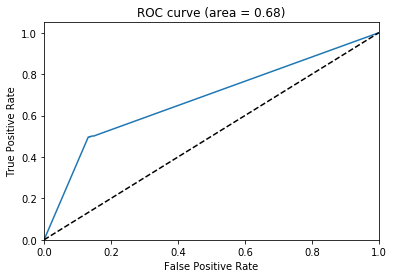

In [23]:
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (area = %0.2f)' % roc_auc)
plt.show()

1f) Using “RandomForestClassifier(n_estimators=100, max_depth=5,random_state=0)”, what is the training accuracy for this random forest?

In [24]:
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
clf_rf.fit(X_train, y_train)
clf_rf.score(X_train, y_train)

C:\Users\michi\Anaconda3\envs\tfenv\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.85925

1g) What is the corresponding testing accuracy? Draw the confusion matrix for this random forest.

In [25]:
pred = clf_rf.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['down', 'up'], columns=['down', 'up'])
print("predicted label:", list(pred))
print("accuracy:", accuracy_score(pred, y_test))
print(cm)

predicted label: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0

1h) Repeat part e. for this random forest. Do you see any improvement in AUC?

In [26]:
score_rf = clf_rf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, score_rf[:, 1])
print ('false positive fraction:', fpr)
print ('true positive fraction:', tpr)
print ('thresholds:', thresholds)

false positive fraction: [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.31711939e-04
 6.31711939e-04 1.26342388e-03 1.26342388e-03 1.89513582e-03
 1.89513582e-03 2.52684776e-03 2.52684776e-03 3.15855970e-03
 3.15855970e-03 3.79027164e-03 3.79027164e-03 4.42198358e-03
 4.42198358e-03 5.05369551e-03 5.05369551e-03 6.31711939e-03
 6.31711939e-03 6.94883133e-03 6.94883133e-03 7.58054327e-03
 7.58054327e-03 8.21225521e-03 8.21225521e-03 1.01073910e-02
 1.01073910e-02 1.07391030e-02 1.07391030e-02 1.13708149e-02
 1.13708149e-02 1.32659507e-02 1.32659507e-02 1.45293746e-02
 1.45293746e-02 1.64245104e-02 1.64245104e-02 1.70562224e-02
 1.70562224e-02 1.76879343e-02 1.76879343e-02 1.83196462e-02
 1.83196462e-02 2.27416298e-02 2.27416298e-02 2.33733418e-02
 2.33733418e-02 2.40050537e-02 2.40050537e-02 2.46367656e-02
 2.46367656e-02 2.52684776e-02 2.52684776e-02 2.59001895e-02
 2.59001895e-02 2.65319015e-02 2.65319015e-02 2.77953253e-02
 2.77953253e-02 3.15855970e-02 3.15855970e-02 3.28490208e-02

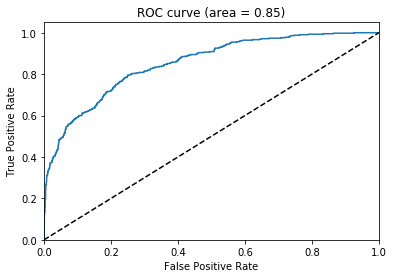

In [27]:
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (area = %0.2f)' % roc_auc)
plt.show()

Q2

2a) Show that KOSPI2 has the highest feature importance for this training data at this learning rate of 0.01.

In [28]:
regr_boosted = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=2, random_state=1)
regr_boosted.fit(X_train, y_train)

C:\Users\michi\Anaconda3\envs\tfenv\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

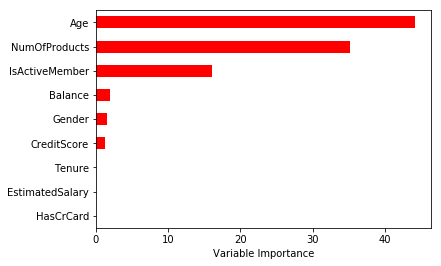

In [29]:
Importance = pd.DataFrame({'Importance': regr_boosted.feature_importances_*100}, index=X.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

2b) What is the MSE for the test data at this learning rate of 0.01?

In [30]:
mean_squared_error(y_test, regr_boosted.predict(X_test))

0.1118511001055327

2c) Repeat your calculation of MSE for the test data at various learning rates from 0.01, 0.02 ,… 0.09, 0.10. Show that the test MSE rises with the learning rate. Hence, this confirms the notion that a gradual learner tends to lower the classification variance, i.e., “taking lots of small steps in the right direction results in better prediction in testing”.

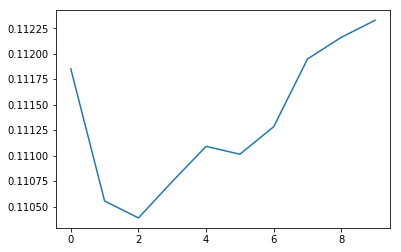

In [31]:
mse_list = []
for i in range(10):
    regr_boosted = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01 * (i + 1), max_depth=2, random_state=1)
    regr_boosted.fit(X_train, y_train.values.ravel())
    mse_list.append(mean_squared_error(y_test, regr_boosted.predict(X_test)))
plt.plot(mse_list)
plt.show()

Q3

3a) First, import stockdata2.csv into your ipynb, then assign hsi_close as the y-variable, and hscei_close, nky_close as the x-variables.

In [33]:
mydata = pd.read_csv("Churn_Modelling.csv", index_col=[1])
del mydata['RowNumber']
del mydata['Surname']

mydata.Gender[mydata.Gender == 'Male'] = 1
mydata.Gender[mydata.Gender == 'Female'] = 0
mydata.sample(10)

C:\Users\michi\Anaconda3\envs\tfenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\michi\Anaconda3\envs\tfenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15653937,638,Germany,0,53,1,123916.67,1,1,0,16657.68,1
15812197,850,France,1,38,7,80293.98,1,0,0,126555.74,0
15741032,733,France,1,48,5,0.00,1,0,1,117830.57,0
15673367,587,Germany,1,33,6,132603.36,1,1,0,55775.72,0
15718773,638,France,0,32,0,0.00,2,1,0,160129.99,0
15593499,686,Spain,0,47,6,0.00,1,1,0,32080.69,1
15737977,527,France,0,25,6,0.00,2,0,1,96758.58,0
15644132,724,France,0,30,9,142475.87,1,1,1,107848.24,0
15633897,725,Germany,1,39,1,50880.98,2,1,1,184023.54,0


3b) Use MinMaxScaler((-1, 1)) to transform the x-variables, then plot the transformed x on a graph, using the y-variable as the color.

In [35]:
scaler_x = MinMaxScaler((-1, 1)) 
x = mydata.loc[:, expl].values
y = mydata.loc[:, "Exited"].values
sX = scaler_x.fit_transform(x)

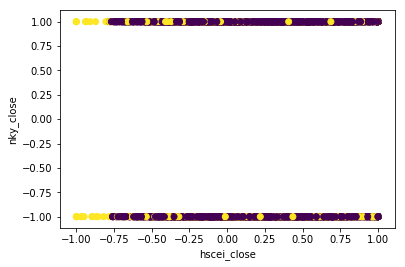

In [36]:
plt.figure(figsize=(6, 4))
plt.scatter(sX[:, 0], sX[:, 1], c=y)
plt.xlabel("hscei_close")
plt.ylabel("nky_close")
plt.show()

3c) Using the python code from tutorial 6, draw 2 dendrograms using this dataset, one for H_C_ward (the Ward method) and one for H_C_complete (the complete linkage method). You can assign n_clusters = 4 in both cases.

In [37]:
def plot_dendrogram(model, **kwargs): # provided by Mathew Kallada. 

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    
    sch.dendrogram(linkage_matrix, **kwargs)

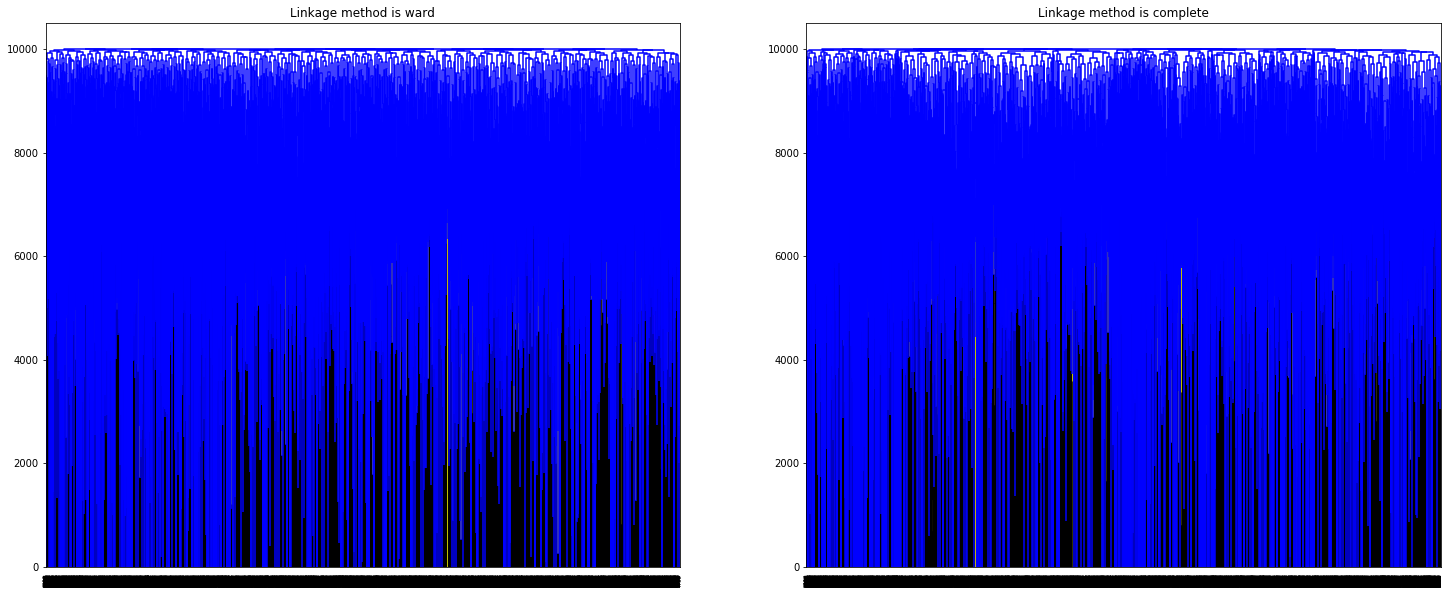

In [42]:
H_C_ward = AgglomerativeClustering(n_clusters=4) # default linkage is ward. 
H_C_complete = AgglomerativeClustering(n_clusters=4, linkage='complete')

pred_hc_ward = H_C_ward.fit_predict(sX)
pred_hc_complete = H_C_complete.fit_predict(sX)

fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(1, 2, 1)
plot_dendrogram(H_C_ward)
ax.set_title('Linkage method is ward')

ax = fig.add_subplot(1, 2, 2)
Z2 = plot_dendrogram(H_C_complete)
ax.set_title('Linkage method is complete')
plt.show()

3d) Using part c, show the Ward linkage clusters and the comlete linkage clusters side-by-side. Based on the true hsi_close values (color) in the MinMaxScaler plot in part b, which linkage method achieves a better result?

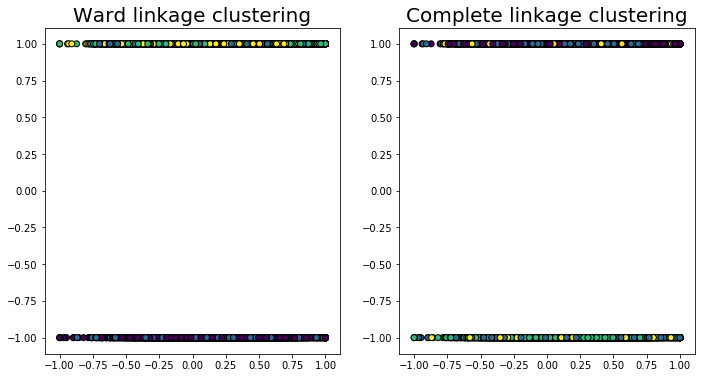

In [43]:
f = plt.figure(figsize=(18, 6))
ax = f.add_subplot(1, 3, 1)
ax.scatter(sX[:, 0], sX[:, 1], c=pred_hc_ward, edgecolors='k')
ax.set_title("Ward linkage clustering", fontsize=20)
ax = f.add_subplot(1, 3, 2)
ax.scatter(sX[:, 0], sX[:, 1], c=pred_hc_complete, edgecolors='k')
ax.set_title("Complete linkage clustering", fontsize=20)
plt.show()

**Remark: Ward and Complete produce more or less similar clusters, although Ward performs a little better in the south west region, where the yellow cluster and blue cluster are separated, just like the MinMaxScaler plot.**

3e) Now, draw the DBSCAN clusters using the parameters DBSCAN(eps=0.3, min_samples=20).

In [44]:
dbscan = DBSCAN(eps=0.3, min_samples=20)
y_pred = dbscan.fit_predict(sX)

3f) How many clusters and noise points have been estimated by this DBSCAN algorithm?

In [45]:
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 10000


3g) Do you think the DBSCAN clusters are more realistic than the linkage clusters in part d, based on the true distribution in the MinMaxScaler plot?

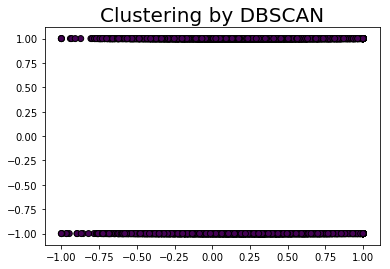

In [46]:
plt.figure(figsize=(6, 4))
plt.scatter(sX[:, 0], sX[:, 1], c=y_pred, edgecolors='k')
plt.title("Clustering by DBSCAN", fontsize=20)
plt.show()

3h) Finally, we will compare the performance of the complete linkage clusters with the DBSCAN clusters using “silhouette_score” and “calinski_harabaz_score”. Which clustering method does the “silhouette_score” favour? How about the “calinski_harabaz_score”?

Q4

4a) Repeat parts a and b of Q3, this time we use stockdata6.csv. Again, we are only using hscei_close and nky_close as the x-variables. Show that the up days and down days are completely intermingled, making it very hard to classify them.

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler((-1, 1)) 
sX = scaler_x.fit_transform(x)

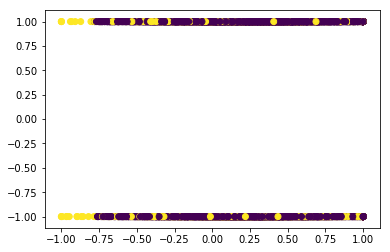

In [49]:
plt.scatter(sX[:, 0], sX[:, 1], c=y)

4b) Use the plot_svc function that you learned in tutorial 7 to find and draw the SVC’s for the following parameters: C=1, kernel='linear'.

In [50]:
# We'll define a function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

In [51]:
svc1 = SVC(C=1, kernel='linear')
svc1.fit(sX, y)
plot_svc(svc1, sX, y)

ValueError: X.shape[1] = 2 should be equal to 9, the number of features at training time

In [36]:
svc1.support_

array([ 0,  3,  6,  7,  8,  9, 10, 12, 14, 15, 17, 19, 23, 24, 25, 30, 31,
       32, 34, 35, 38, 39, 42, 43, 44, 50, 51, 52, 54, 56, 63, 65, 66, 67,
       69, 71, 72, 75, 76, 78, 79, 80,  1,  2,  4,  5, 11, 18, 20, 21, 22,
       27, 28, 29, 33, 36, 37, 40, 41, 45, 46, 47, 48, 49, 53, 55, 57, 58,
       60, 61, 62, 64, 68, 70, 73, 74, 77, 81, 85, 91, 93, 94, 97],
      dtype=int32)

4c) Now, repeat part b with the following parameters: C=100, kernel='linear'.

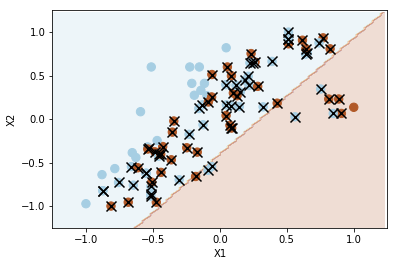

Number of support vectors:  81


In [37]:
svc2 = SVC(C=100, kernel='linear')
svc2.fit(sX, y)
plot_svc(svc2, sX, y)

In [38]:
svc2.support_

array([ 0,  3,  6,  7,  8,  9, 10, 12, 14, 15, 17, 19, 23, 24, 25, 30, 31,
       32, 34, 35, 38, 39, 42, 43, 44, 50, 51, 52, 54, 63, 65, 66, 67, 69,
       71, 72, 75, 76, 78, 79, 80,  1,  4,  5, 11, 18, 20, 21, 22, 27, 28,
       29, 33, 36, 37, 40, 41, 45, 46, 47, 48, 49, 53, 55, 57, 58, 60, 61,
       62, 64, 68, 70, 73, 74, 77, 81, 85, 91, 93, 94, 97], dtype=int32)

4d) Based on parts c and d, show that no matter what cost parameter C you use, the number of estimated linear SVCs are hopelessly large when compared to the sample size (99). This indicates that the regional indexes (HSCEI and NEKKI) are virtually useless in classifying the up days and down days in HSI. However, a large C appears to at least separate the data space into up and down regions, whereas a small C cannot even do this.

In [39]:
for i in range(6):
    svc = SVC(C=10**i, kernel='linear')
    svc.fit(sX, y)
    print("C:", 10**i, "Number of support vectors:", len(svc.support_))

C: 1 Number of support vectors: 83
C: 10 Number of support vectors: 82
C: 100 Number of support vectors: 81
C: 1000 Number of support vectors: 81
C: 10000 Number of support vectors: 81
C: 100000 Number of support vectors: 81


Q5 (Quite challenging) To the best of your ability, use MATPLOTLIB to reproduce the following picture:

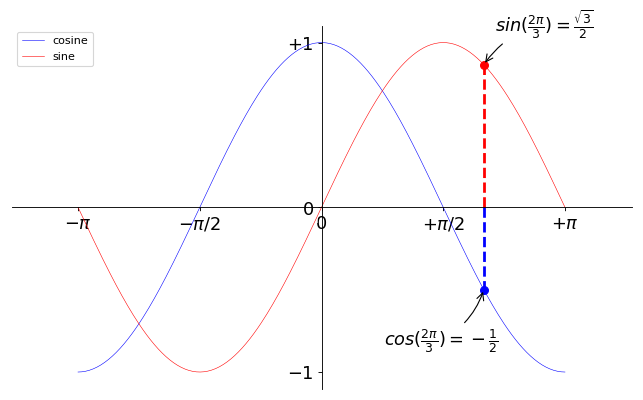

In [40]:
# Create a figure of size 10x6 inches, 80 dots per inch
plt.figure(figsize=(10, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C, color="blue", linewidth=0.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=0.5, linestyle="-", label="sine")
plt.legend(loc='upper left')

plt.xlim(-4.0, 4.0)

plt.ylim(-1.1, 1.1)

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
          [r'$-1$', r'$0$', r'$+1$'])

ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none') # none means I don't want to show it
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

# make the tick labels more visible
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.65))

# to annotate some points (annotate means text description in labels)
t = 2 * np.pi / 3
plt.plot([t, t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle="--") # plot annotated pt line
plt.scatter([t, ], [np.cos(t), ], 50, color='blue') # plot annotated pt

plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([t, ],[np.sin(t), ], 50, color='red') # connect annotated pts (sine and cosine)

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.savefig("ploteg.png", dpi=72)

plt.show()